In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# The XLSX file is loaded into a DataFrame.
df = pd.read_excel(r'C:\Users\Alvaro\OneDrive\Documentos\Primer proyecto\codigo\Rinconcito_del_sabor\Datos-RS.xlsx')


In [7]:
df

,Operacion,Fecha,Tipo,Concepto,Entrada,Salida,DiaSemanaNum,DiaSemana
0,GASTOS,2022-04-25,Gastos de desechables,"desechables, bosas y azucar, 25/04/2022",0,10500.0,0,Lunes
1,GASTOS,2022-04-25,Gastos de bebidas,"cocacola, fuze, quatro coca-cola 25/04/2022",0,53600.0,0,Lunes
2,GASTOS,2022-04-25,Gastos de mecato,"proves, deditos y morenitas 25/04/2022",0,17007.0,0,Lunes
3,GASTOS,2022-04-25,insumos,"ara huevos y arroz, 25/04/2022",0,17010.0,0,Lunes
4,GASTOS,2022-04-25,insumos,"d1 pechugas, 25/04/2022",0,14650.0,0,Lunes
...,...,...,...,...,...,...,...,...
2988,GASTOS,2022-07-30,insumos,"ara, 30/07/2022",0,19150.0,5,Sábado
2989,GASTOS,2022-07-30,insumos,"masa, 30/07/2022",0,14000.0,5,Sábado
2990,GASTOS,2022-07-30,nomina,"fanny, 30/07/2022",0,20000.0,5,Sábado
2991,GASTOS,2022-07-30,nomina,"felipe, 30/07/2022",0,10000.0,5,Sábado


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Operacion     2993 non-null   object        
 1   Fecha         2993 non-null   datetime64[ns]
 2   Tipo          2993 non-null   object        
 3   Concepto      2993 non-null   object        
 4   Entrada       2993 non-null   int64         
 5   Salida        2993 non-null   float64       
 6   DiaSemanaNum  2993 non-null   int64         
 7   DiaSemana     2993 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 187.2+ KB


In [36]:
# The "año" and "mes" columns are removed.

df.drop(columns=['DiaSemanaNum','año'], inplace=True)

df

,Operacion,Fecha,Tipo,Concepto,Entrada,Salida,DiaSemana
0,GASTOS,2022-04-25,Gastos de desechables,"desechables, bosas y azucar, 25/04/2022",0,10500.0,Lunes
1,GASTOS,2022-04-25,Gastos de bebidas,"cocacola, fuze, quatro coca-cola 25/04/2022",0,53600.0,Lunes
2,GASTOS,2022-04-25,Gastos de mecato,"proves, deditos y morenitas 25/04/2022",0,17007.0,Lunes
3,GASTOS,2022-04-25,insumos,"ara huevos y arroz, 25/04/2022",0,17010.0,Lunes
4,GASTOS,2022-04-25,insumos,"d1 pechugas, 25/04/2022",0,14650.0,Lunes
...,...,...,...,...,...,...,...
2988,GASTOS,2022-07-30,insumos,"ara, 30/07/2022",0,19150.0,Sábado
2989,GASTOS,2022-07-30,insumos,"masa, 30/07/2022",0,14000.0,Sábado
2990,GASTOS,2022-07-30,nomina,"fanny, 30/07/2022",0,20000.0,Sábado
2991,GASTOS,2022-07-30,nomina,"felipe, 30/07/2022",0,10000.0,Sábado


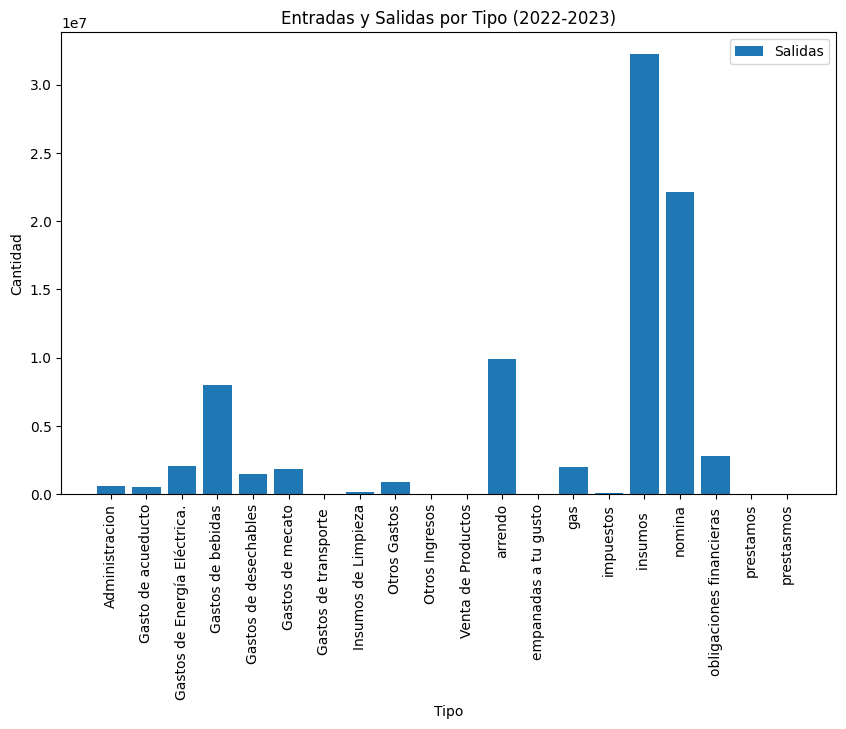

In [10]:
# The year is extracted from the date column
df['year'] = df['Fecha'].dt.year

# The data is grouped by type and year, summing the entries and exits
data_grouped = df.groupby(['Tipo', 'year'])[['Salida']].sum().reset_index()

# A stacked bar chart is created
plt.figure(figsize=(10, 6))
plt.bar(data_grouped['Tipo'], data_grouped['Salida'], label='Salidas')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.title('Entradas y Salidas por Tipo (2022-2023)')
plt.xticks(rotation=90)
plt.legend()
plt.show()


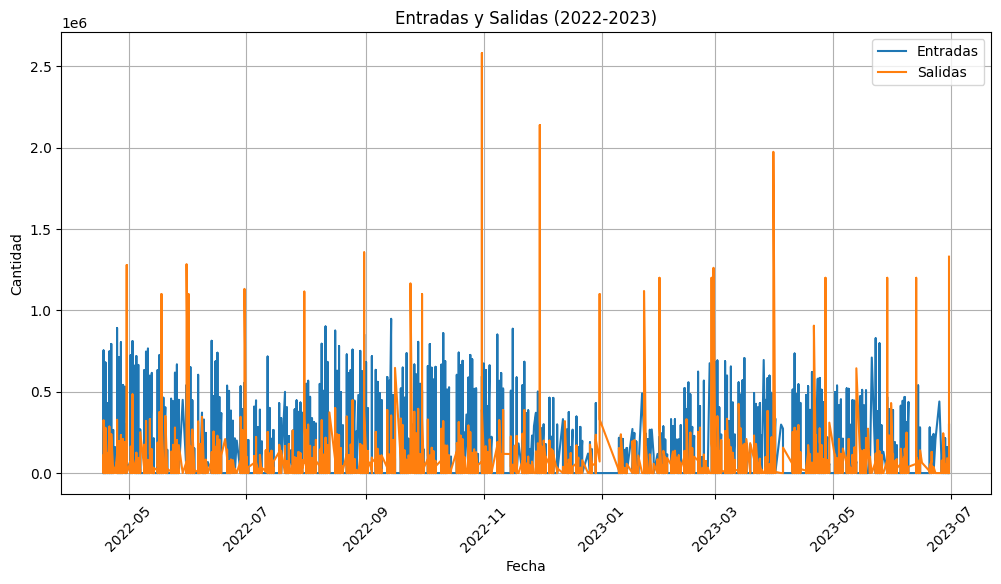

In [11]:
# Data is grouped by date and type, summing entries and exits
data_grouped = df.groupby(['Fecha', 'Tipo'])[['Entrada', 'Salida']].sum().reset_index()

# A line chart is created
plt.figure(figsize=(12, 6))
plt.plot(data_grouped['Fecha'], data_grouped['Entrada'], label='Entradas')
plt.plot(data_grouped['Fecha'], data_grouped['Salida'], label='Salidas')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.title('Entradas y Salidas (2022-2023)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


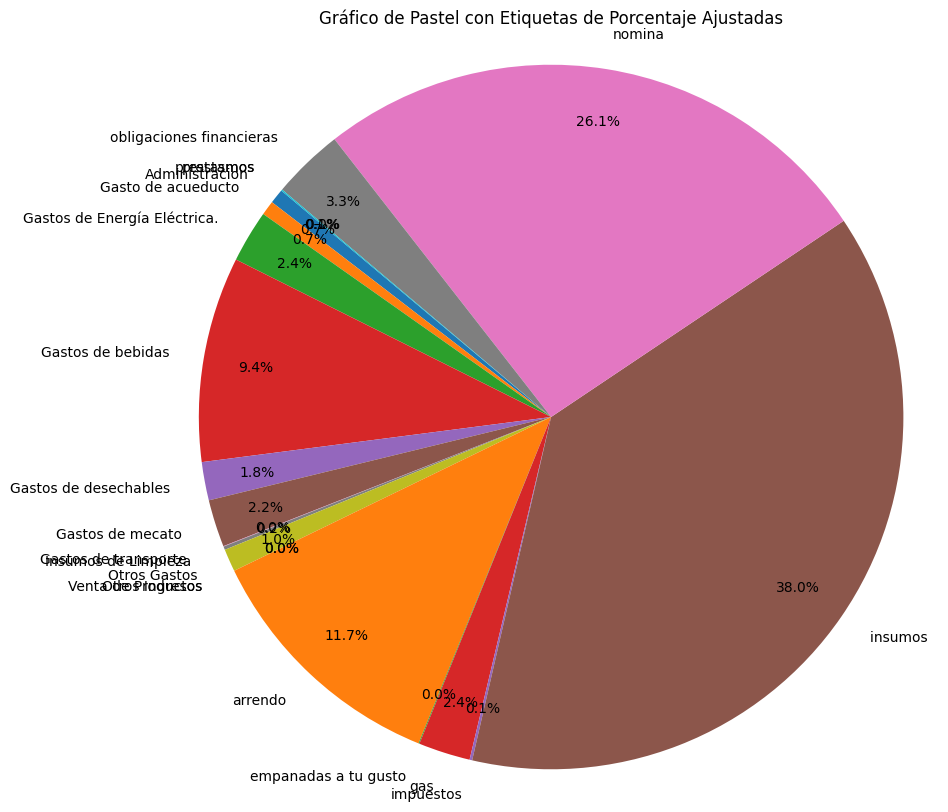

In [12]:
# I filter the DataFrame for the year 2022
data_2022 = df[df['Fecha'].dt.year == 2022]

# Data is grouped by type and entries and exits are summed
data_grouped = data_2022.groupby('Tipo')[['Salida']].sum()

# Adjust the percentage label distance from the center of the chart
pctdistance = 0.85  

# A pie chart is created
plt.figure(figsize=(10, 10))
plt.pie(data_grouped['Salida'], labels=data_grouped.index, autopct='%1.1f%%', pctdistance=pctdistance, startangle=140) 
plt.title('Gráfico de Pastel con Etiquetas de Porcentaje Ajustadas')
plt.axis('equal')
plt.show()


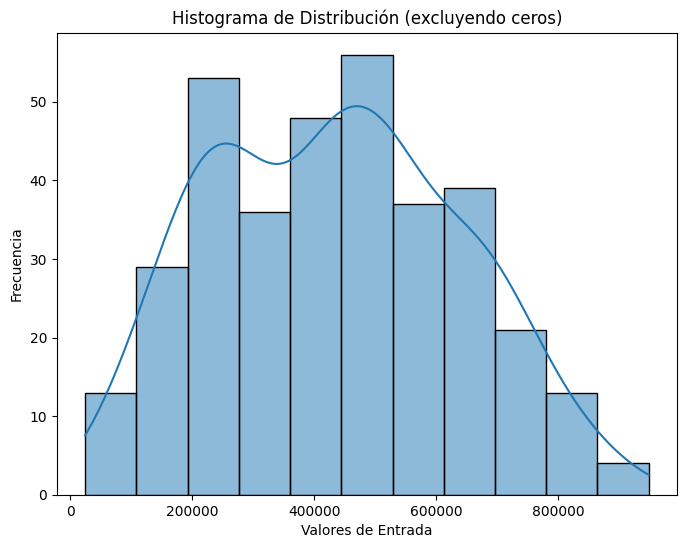

In [15]:
# Filter the data to exclude values equal to zero in the 'entry' column
df_filtered = df[df['Entrada'] != 0]

# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=df_filtrado, x='Entrada', kde=True)
plt.title('Histograma de Distribución (excluyendo ceros)')
plt.xlabel('Valores de Entrada')
plt.ylabel('Frecuencia')
plt.show()



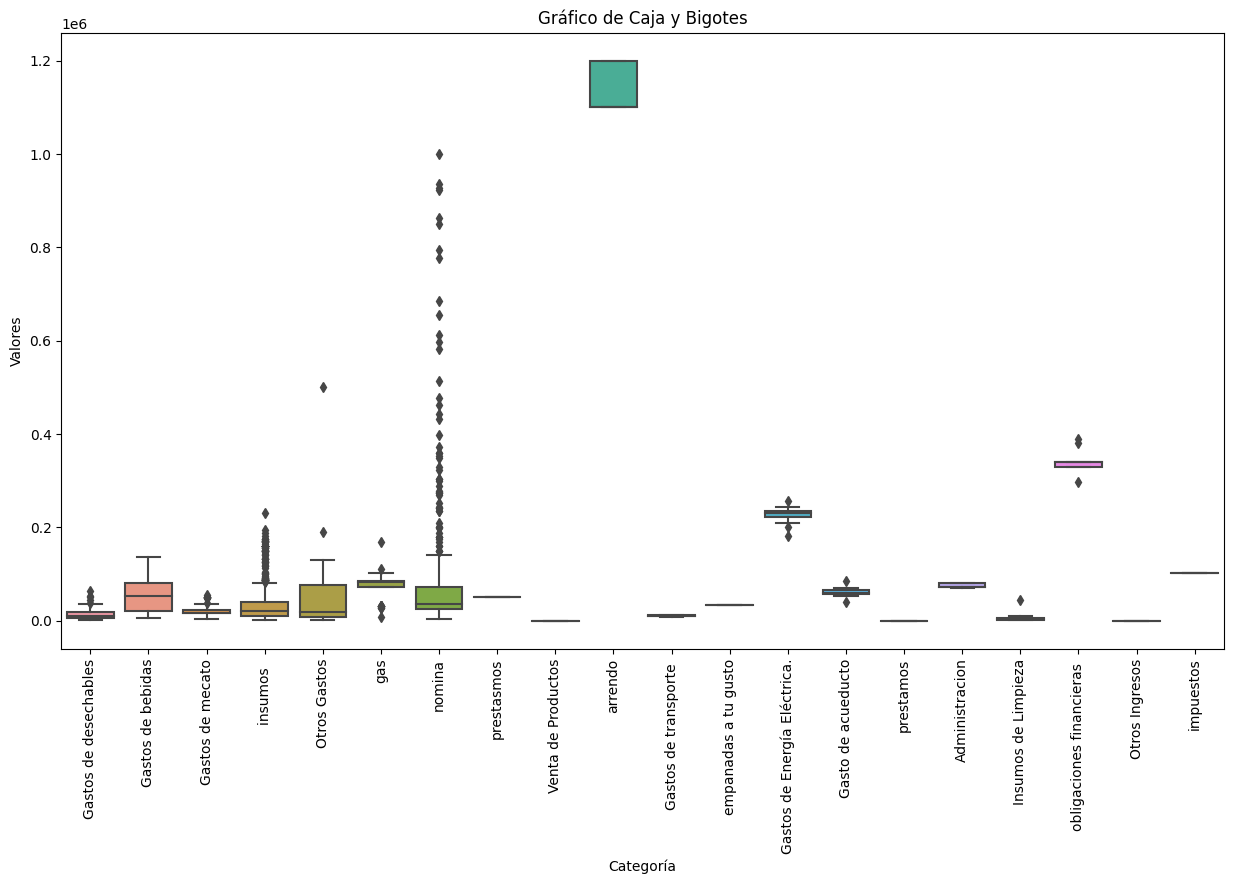

In [27]:
# Create a boxplot chart
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='Tipo', y='Salida')
plt.xticks(rotation=90)  # Rotate category labels vertically
plt.title('Gráfico de Caja y Bigotes')
plt.xlabel('Categoría')
plt.ylabel('Valores')
plt.show()


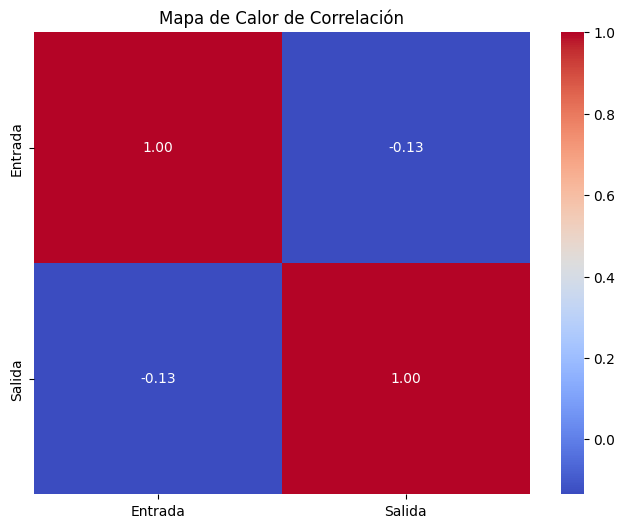

In [37]:
# Filter only the numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Filter the rows where neither of the two columns has a value equal to zero
df_filtered = df[(df['Entrada'] != 0) | (df['Salida'] != 0)]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()

